### **GPU 설정**

In [5]:
import tensorflow as tf

# GPU 디바이스 확인
tf.test.gpu_device_name()

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# TensorFlow가 GPU를 사용할 수 있도록 설정합니다.
if len(tf.config.list_physical_devices('GPU')) > 0:
    print('GPU is enabled')
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)


Num GPUs Available:  1
GPU is enabled


### **Colab 설정**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **모듈 불러오기**

In [7]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


### **데이터 불러오기**

In [8]:
X_test = np.load('/content/drive/MyDrive/PneumoniaClassifier/data/X_test.npy')
y_test = np.load('/content/drive/MyDrive/PneumoniaClassifier/data/y_test.npy')

In [9]:
X_test = X_test/255.

### **모델 5개 불러오기**

In [10]:
model1_path = '/content/drive/MyDrive/PneumoniaClassifier/model/model1.h5'
model2_path = '/content/drive/MyDrive/PneumoniaClassifier/model/model2.h5'
model3_path = '/content/drive/MyDrive/PneumoniaClassifier/model/model3.h5'
model4_path = '/content/drive/MyDrive/PneumoniaClassifier/model/model4.h5'
model5_path = '/content/drive/MyDrive/PneumoniaClassifier/model/model5.h5'

In [11]:
# 모델 로드
model1 = tf.keras.models.load_model(model1_path)

input_data = X_test[0]
input_data = input_data.reshape((1, 200, 200, 3))  # 입력 데이터의 형상 변경
output = model1.predict(input_data)
pred1 = model1.predict(X_test)

output = output[0][0]
print(output)

99/99 [==============================] - 7s 58ms/step
0.0067847017


In [12]:
# 모델 로드
model2 = tf.keras.models.load_model(model2_path)

input_data = X_test[0]
input_data = input_data.reshape((1, 200, 200, 3))  # 입력 데이터의 형상 변경
output = model2.predict(input_data)
pred2 = model2.predict(X_test)

output=output[0][0]
print(output)

99/99 [==============================] - 8s 67ms/step
0.0003077724


In [13]:
# 모델 로드
model3 = tf.keras.models.load_model(model3_path)

input_data = X_test[0]
input_data = input_data.reshape((1, 200, 200, 3))  # 입력 데이터의 형상 변경
output = model3.predict(input_data)
pred3 = model3.predict(X_test)

output=output[0][0]
print(output)

99/99 [==============================] - 15s 137ms/step
0.11753568


In [14]:
# 모델 로드
model4 = tf.keras.models.load_model(model4_path)

input_data = X_test[0]
input_data = input_data.reshape((1, 200, 200, 3))  # 입력 데이터의 형상 변경
output = model4.predict(input_data)
pred4 = model4.predict(X_test)

output=output[0][0]
print(output)

99/99 [==============================] - 21s 168ms/step
0.010366204


In [15]:
# 모델 로드
model5 = tf.keras.models.load_model(model5_path)

input_data = X_test[0]
input_data = input_data.reshape((1, 200, 200, 3))  # 입력 데이터의 형상 변경
output = model5.predict(input_data)
pred5 = model5.predict(X_test)

output=output[0][0]
print(output)

99/99 [==============================] - 12s 98ms/step
0.24832731


In [16]:
print(y_test)

[0 0 0 ... 1 1 1]


In [35]:
b_pred1 = np.where(pred1 > 0.5, 1, 0).T[0]
b_pred2 = np.array([1 if x[0]==1 else 0 for x in (np.where(pred2 > 0.5, 1, 0))])
b_pred3 = np.where(pred3 > 0.5, 1, 0).T[0]
b_pred4 = np.array([1 if x[0]==1 else 0 for x in (np.where(pred4 > 0.5, 1, 0))])
b_pred5 = np.array([1 if x[0]==1 else 0 for x in (np.where(pred5 > 0.5, 1, 0))])

In [53]:
from keras.metrics.confusion_metrics import Precision
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def analazyer(num, pred, y_test, return_value = True):

  accuracy = accuracy_score(y_test, pred)
  Precision = precision_score(y_test, pred)
  Recall = recall_score(y_test, pred)
  F1_score = f1_score(y_test, pred)
  conf_mat = confusion_matrix(y_test, pred)

  print(f"모델 {num} 정확도 : {accuracy}")
  print(f"모델 {num} 정밀도 : {Precision}")
  print(f"모델 {num} 재현율 : {Recall}")
  print(f"모델 {num} F1 score : {F1_score}")

  # confusion matrix 시각화
  plt.figure()
  plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(f'Confusion matrix of model {num}')
  plt.xlabel('True label')
  plt.ylabel('Predicted label')
  plt.colorbar()

  # 축에 T와 F 표기
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, ['T', 'F'])
  plt.yticks(tick_marks, ['P', 'N'])

  # 숫자 표시
  for i in range(len(conf_mat)):
      for j in range(len(conf_mat[0])):
          plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')

  plt.show()

  if return_value:
    return accuracy, Precision, Recall, F1_score, conf_mat



모델 1 정확도 : 0.903348073278585
모델 1 정밀도 : 0.9165035877364645
모델 1 재현율 : 0.8875552747946936
모델 1 F1 score : 0.9017971758664955


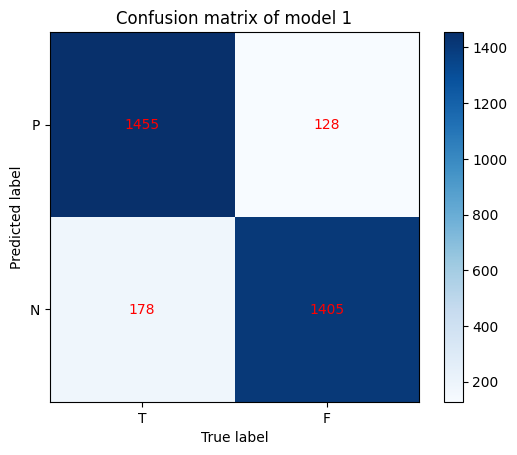

In [54]:
acc_1, _, _, f1_1, _ = analazyer(1, b_pred1, y_test)

모델 2 정확도 : 0.9216677195198989
모델 2 정밀도 : 0.9638637943015983
모델 2 재현율 : 0.8761844598862919
모델 2 F1 score : 0.9179351422898743


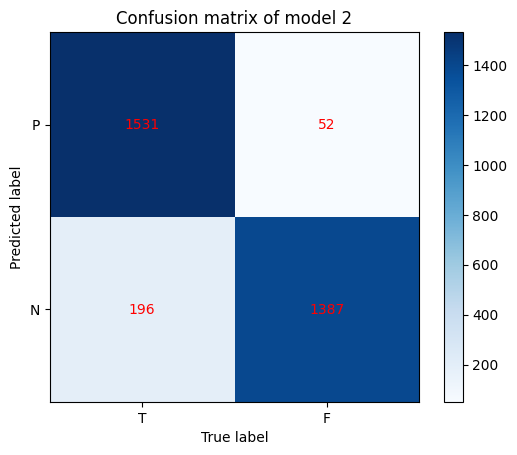

In [55]:
acc_2, _, _, f1_2, _ = analazyer(2, b_pred2, y_test)

모델 3 정확도 : 0.8660770688566014
모델 3 정밀도 : 0.8154599891126837
모델 3 재현율 : 0.9463044851547694
모델 3 F1 score : 0.8760233918128654


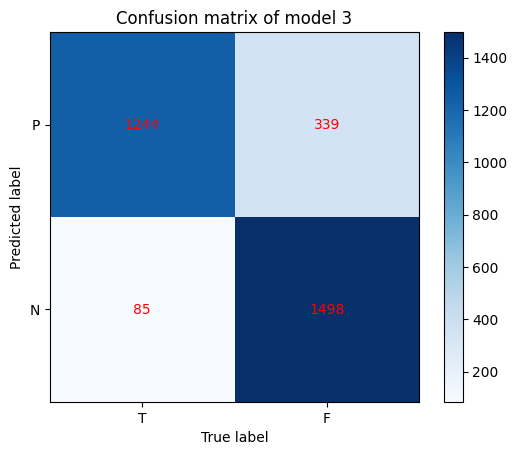

In [56]:
acc_3, _, _, f1_3, _ = analazyer(3, b_pred3, y_test)

모델 4 정확도 : 0.9380922299431459
모델 4 정밀도 : 0.9420012746972594
모델 4 재현율 : 0.9336702463676564
모델 4 F1 score : 0.9378172588832487


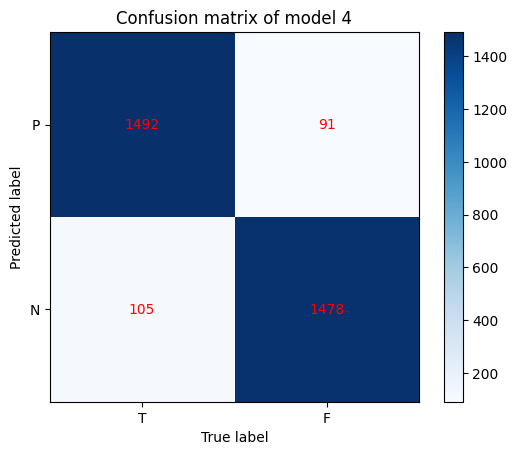

In [57]:
acc_4, _, _, f1_4, _ = analazyer(4, b_pred4, y_test)

모델 5 정확도 : 0.8550221099178774
모델 5 정밀도 : 0.895774647887324
모델 5 재현율 : 0.8035375868603917
모델 5 F1 score : 0.8471528471528471


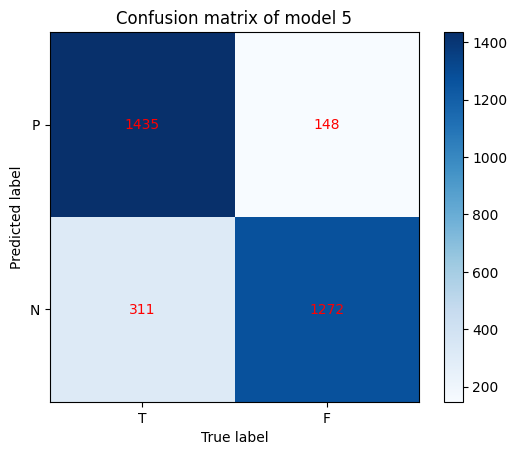

In [58]:
acc_5, _, _, f1_5, _ = analazyer(5, b_pred5, y_test)

In [59]:
acc = [acc_1, acc_2, acc_3, acc_4, acc_5]
f1 = [f1_1, f1_2, f1_3, f1_4, f1_5]

print(acc)
print(f1)

[0.903348073278585, 0.9216677195198989, 0.8660770688566014, 0.9380922299431459, 0.8550221099178774]
[0.9017971758664955, 0.9179351422898743, 0.8760233918128654, 0.9378172588832487, 0.8471528471528471]


## **최적의 앙상블 모델 찾기**

$$EnsemblePredict=\sum\alpha_nP_n\qquad(\sum\alpha_n=1)$$
$P_n$ : n번째 모델의 예측값, $\alpha_n$ : n번째 모델의 가중치

### **가중치 설정 방법**
> 가설 0. 전부 동일한 가중치

$$\alpha_n=\frac{1}{n}$$

> 가설 1. 데이터의 정확도에 기반.

$(ACC)_n$ : n 번째 모델의 정확도

방법 1: 단순 정확도 비율
$$\alpha_n=\frac{(ACC)_n}{\sum (ACC)_n}$$

방법 2: 정규분포 응용
$$\alpha_n=\frac{(CACC)_n}{\sum (CACC)_n}$$

$$(CACC)_n=\frac{(ACC)_n-E((ACC)_n)}{\sigma((ACC)_n)} - min(\frac{(ACC)_n-E((ACC)_n)}{\sigma((ACC)_n)})$$

방법 3: Softmax 응용
$$\alpha_n=\frac{e^{(ACC)_n}}{\sum e^{(ACC)_n}}$$

> 가설 2. 데이터의 F1 score에 기반

$(F1)_n$ : n 번째 모델의 F1 Score

방법 1: 단순 F1 Score 비율
$$\alpha_n=\frac{(F1)_n}{\sum (F1)_n}$$

방법 2: 정규분포 응용
$$\alpha_n=\frac{(CF1)_n}{\sum (CF1)_n}$$

$$(CF1)_n=\frac{(F1)_n-E((F1)_n)}{\sigma((F1)_n)} - min(\frac{(F1)_n-E((F1)_n)}{\sigma((F1)_n)})$$

방법 3: Softmax 응용
$$\alpha_n=\frac{e^{(F1)_n}}{\sum e^{(F1)_n}}$$

In [60]:
p_pred1 = pred1.T[0]
p_pred2 = np.array([x[0] for x in pred2])
p_pred3 = pred3.T[0]
p_pred4 = np.array([x[0] for x in pred4])
p_pred5 = np.array([x[0] for x in pred5])

preds = [p_pred1, p_pred2, p_pred3, p_pred4, p_pred5]

In [61]:
model_num = 5
data_size = len(p_pred1)

### **1.1. 단순 정확도 비율**

가중치 설정 [0.20145101077692473, 0.20553638092554766, 0.1931393956469677, 0.2091991265760372, 0.1906740860745228]
모델 ENSEMBLE_1_1 정확도 : 0.9491471888818699
모델 ENSEMBLE_1_1 정밀도 : 0.9546035805626598
모델 ENSEMBLE_1_1 재현율 : 0.9431459254579911
모델 ENSEMBLE_1_1 F1 score : 0.9488401652367334


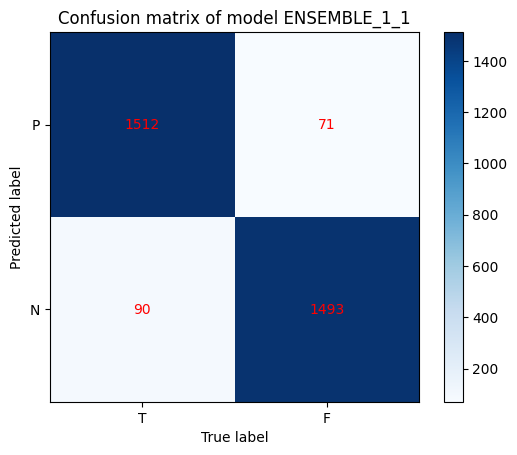

In [62]:
weight_1_1 = [acc[i]/sum(acc) for i in range(model_num)]
print("가중치 설정", weight_1_1)
ensemble_pred_1_1 = np.array([sum([weight_1_1[i] * preds[i][j] for i in range(model_num)]) for j in range(data_size)])
b_ensemble_pred_1_1 = np.where(ensemble_pred_1_1 > 0.5, 1, 0)

analazyer("ENSEMBLE_1_1", b_ensemble_pred_1_1, y_test, return_value = False)

### **1.2. 정규분포 응용 정확도 비율**

In [63]:
# 평균 계산
mean_acc = np.mean(acc)
# 표준 편차 계산
std_acc = np.std(acc)

cacc = []
for i in range(len(acc)):
    cacc.append(((acc[i] - mean_acc) / std_acc) - ((min(acc) - mean_acc) / std_acc))

print(cacc)

[1.5197729042442087, 2.09589596598384, 0.3476604682911598, 2.612420090302132, 0.0]


가중치 설정 [0.23111782477341414, 0.3187311178247732, 0.052870090634441286, 0.39728096676737135, 0.0]
모델 ENSEMBLE_1_2 정확도 : 0.950726468730259
모델 ENSEMBLE_1_2 정밀도 : 0.9660352710646636
모델 ENSEMBLE_1_2 재현율 : 0.934301958307012
모델 ENSEMBLE_1_2 F1 score : 0.9499036608863198


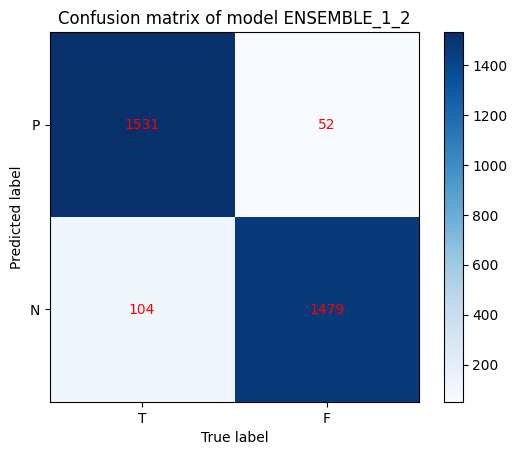

In [64]:
weight_1_2 = [cacc[i]/sum(cacc) for i in range(model_num)]
print("가중치 설정", weight_1_2)
ensemble_pred_1_2 = np.array([sum([weight_1_2[i] * preds[i][j] for i in range(model_num)]) for j in range(data_size)])
b_ensemble_pred_1_2 = np.where(ensemble_pred_1_2 > 0.5, 1, 0)

analazyer("ENSEMBLE_1_2", b_ensemble_pred_1_2, y_test, return_value = False)

### **1.3. Softmax 응용 정확도 비율**

가중치 설정 [0.20120395 0.2049239  0.1938429  0.20831747 0.19171178]
모델 ENSEMBLE_1_3 정확도 : 0.9491471888818699
모델 ENSEMBLE_1_3 정밀도 : 0.9546035805626598
모델 ENSEMBLE_1_3 재현율 : 0.9431459254579911
모델 ENSEMBLE_1_3 F1 score : 0.9488401652367334


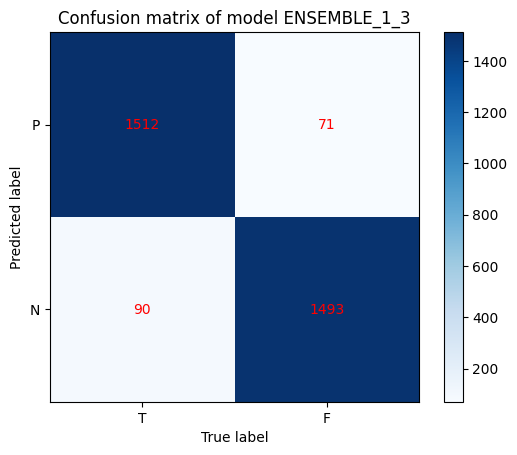

In [65]:
# softmax 함수 적용
weight_1_3 = np.exp(acc) / np.sum(np.exp(acc))
print("가중치 설정", weight_1_3)
ensemble_pred_1_3 = np.array([sum([weight_1_3[i] * preds[i][j] for i in range(model_num)]) for j in range(data_size)])
b_ensemble_pred_1_3 = np.where(ensemble_pred_1_3 > 0.5, 1, 0)

analazyer("ENSEMBLE_1_3", b_ensemble_pred_1_3, y_test, return_value = False)

### **2.1. 단순 F1 score 비율**

가중치 설정 [0.20126140560648462, 0.2048630467436712, 0.19550926072817823, 0.20930030030700122, 0.18906598661466487]
모델 ENSEMBLE_2_1 정확도 : 0.9491471888818699
모델 ENSEMBLE_2_1 정밀도 : 0.9546035805626598
모델 ENSEMBLE_2_1 재현율 : 0.9431459254579911
모델 ENSEMBLE_2_1 F1 score : 0.9488401652367334


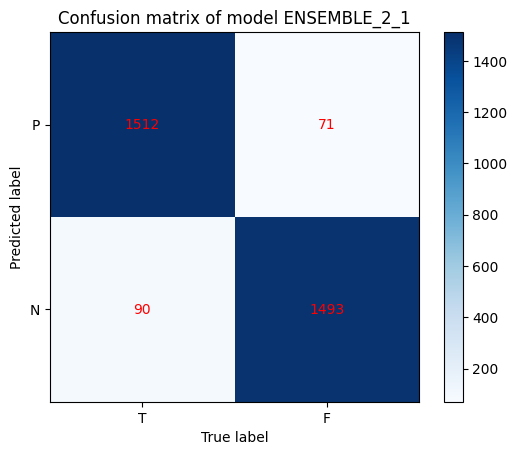

In [66]:
weight_2_1 = [f1[i]/sum(f1) for i in range(model_num)]
print("가중치 설정", weight_2_1)
ensemble_pred_2_1 = np.array([sum([weight_2_1[i] * preds[i][j] for i in range(model_num)]) for j in range(data_size)])
b_ensemble_pred_2_1 = np.where(ensemble_pred_2_1 > 0.5, 1, 0)

analazyer("ENSEMBLE_2_1", b_ensemble_pred_2_1, y_test, return_value = False)

### **2.2. 정규분포 응용 F1 score 비율**

In [67]:
# 평균 계산
mean_f1 = np.mean(f1)
# 표준 편차 계산
std_f1 = np.std(f1)

cf1 = []
for i in range(len(f1)):
    cf1.append(((f1[i] - mean_f1) / std_f1) - ((min(f1) - mean_f1) / std_f1))

print(cf1)

[1.7196944719632963, 2.2275673345332416, 0.9085758252164643, 2.8532711687907186, 0.0]


가중치 설정 [0.22307305766017074, 0.28895263929699505, 0.11785743965075406, 0.37011686339208016, 0.0]
모델 ENSEMBLE_2_2 정확도 : 0.9504106127605811
모델 ENSEMBLE_2_2 정밀도 : 0.9611901681759379
모델 ENSEMBLE_2_2 재현율 : 0.9387239418825016
모델 ENSEMBLE_2_2 F1 score : 0.9498242249920102


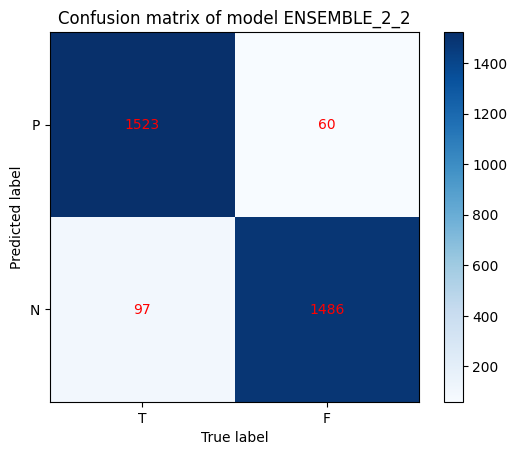

In [68]:
weight_2_2 = [cf1[i]/sum(cf1) for i in range(model_num)]
print("가중치 설정", weight_2_2)
ensemble_pred_2_2 = np.array([sum([weight_2_2[i] * preds[i][j] for i in range(model_num)]) for j in range(data_size)])
b_ensemble_pred_2_2 = np.where(ensemble_pred_2_2 > 0.5, 1, 0)

analazyer("ENSEMBLE_2_2", b_ensemble_pred_2_2, y_test, return_value = False)

### **2.3. Softmax 응용 F1 score 비율**

가중치 설정 [0.20103238 0.20430296 0.19591722 0.20840558 0.19034185]
모델 ENSEMBLE_2_3 정확도 : 0.9491471888818699
모델 ENSEMBLE_2_3 정밀도 : 0.9546035805626598
모델 ENSEMBLE_2_3 재현율 : 0.9431459254579911
모델 ENSEMBLE_2_3 F1 score : 0.9488401652367334


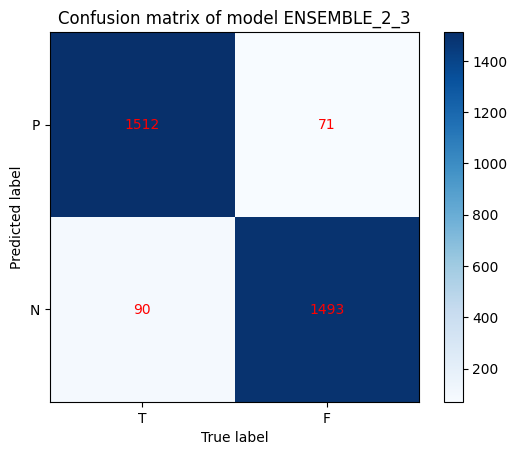

In [69]:
# softmax 함수 적용
weight_2_3 = np.exp(f1) / np.sum(np.exp(f1))
print("가중치 설정", weight_2_3)
ensemble_pred_2_3 = np.array([sum([weight_2_3[i] * preds[i][j] for i in range(model_num)]) for j in range(data_size)])
b_ensemble_pred_2_3 = np.where(ensemble_pred_2_3 > 0.5, 1, 0)

analazyer("ENSEMBLE_2_3", b_ensemble_pred_2_3, y_test, return_value = False)

## 결과

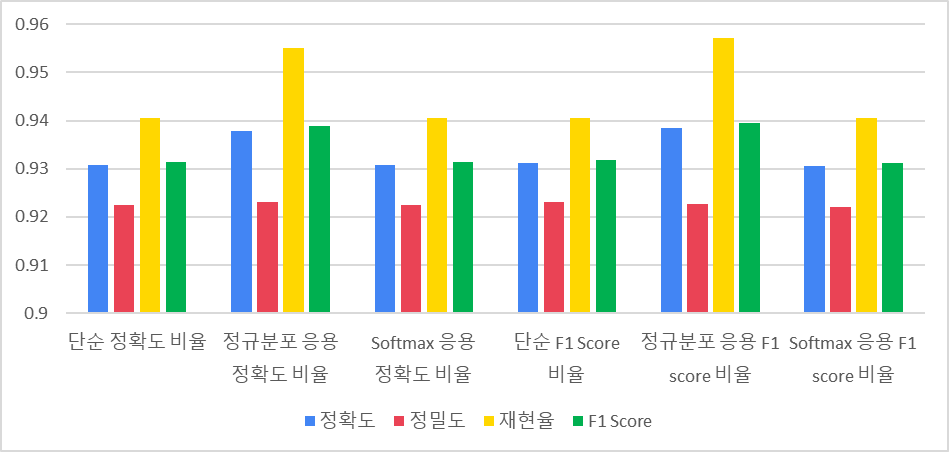